In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [2]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv")

In [3]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [5]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [6]:
df.shape

(1000, 16)

In [7]:
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

# Cleaning Data!

In [9]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [10]:
df = df.drop_duplicates()

In [11]:
df = df.dropna(axis=0, how='any')

df.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [12]:
df = df.drop('Poster_Link', axis=1)
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [13]:
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Runtime']

0      142
1      175
2      152
3      202
4       96
      ... 
990    157
991    144
992     78
994     87
997    118
Name: Runtime, Length: 714, dtype: int64

In [14]:
df['Gross'] = df["Gross"].str.replace(',','')
df['Gross'] = df['Gross'].astype(int)

In [15]:
df = df.drop(df[df['Released_Year'] == 'PG'].index)

In [16]:
df = df[~df['Released_Year'].str.contains('[a-zA-Z]', na=False)]
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')  # Convert to numeric
df = df.dropna(subset=['Released_Year'])  # Drop rows with NaN values in 'Released_Year'
df['Released_Year'] = df['Released_Year'].astype(int)

In [17]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


# Analysis

# 1. The highest rated Directors with at least 5 movies.


In [18]:
highest_rated_director = df.groupby('Director')['IMDB_Rating'].agg(['count','mean']).loc[lambda x: x['count']>=5].sort_values('mean' ,ascending=False).head(10)

highest_rated_director 

,count,mean
Director,,
Christopher Nolan,8,8.462500
Peter Jackson,5,8.400000
Francis Ford Coppola,5,8.400000
Stanley Kubrick,6,8.266667
Sergio Leone,5,8.240000
Quentin Tarantino,8,8.175000
Martin Scorsese,10,8.170000
Alfred Hitchcock,9,8.144444
Hayao Miyazaki,7,8.142857


# 2. Sample data of Directors and the No. of Movies that they directed

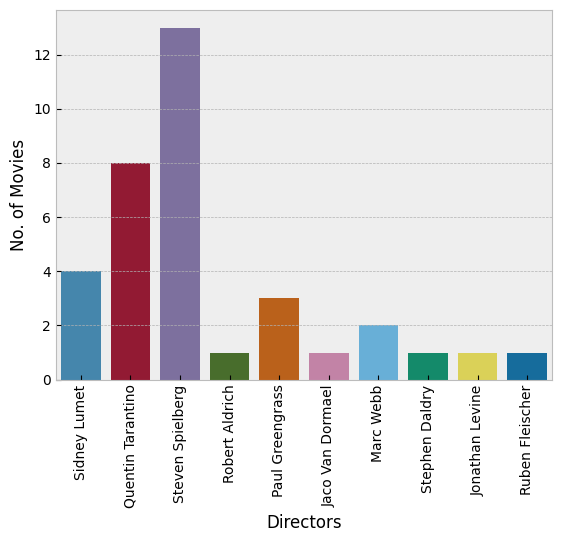

In [19]:
seed = 123

sample_data = df[df['Director'].isin(df['Director'].sample(10, random_state=seed))]

sns.countplot(x='Director', data=sample_data)
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('No. of Movies')
plt.show()

# 3. Top 10 movies based on IMDB Rating

In [20]:
top_10_movies = df.sort_values('IMDB_Rating', ascending=False)[['Series_Title','Director', 'IMDB_Rating', 'Meta_score', 'Gross']]

top_10_movies.head(10)

,Series_Title,Director,IMDB_Rating,Meta_score,Gross
0,The Shawshank Redemption,Frank Darabont,9.3,80.0,28341469
1,The Godfather,Francis Ford Coppola,9.2,100.0,134966411
2,The Dark Knight,Christopher Nolan,9.0,84.0,534858444
3,The Godfather: Part II,Francis Ford Coppola,9.0,90.0,57300000
4,12 Angry Men,Sidney Lumet,9.0,96.0,4360000
5,The Lord of the Rings: The Return of the King,Peter Jackson,8.9,94.0,377845905
6,Pulp Fiction,Quentin Tarantino,8.9,94.0,107928762
7,Schindler's List,Steven Spielberg,8.9,94.0,96898818
10,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,8.8,92.0,315544750
12,"Il buono, il brutto, il cattivo",Sergio Leone,8.8,90.0,6100000


# 4. The correlation between Runtime and IMDB Rating

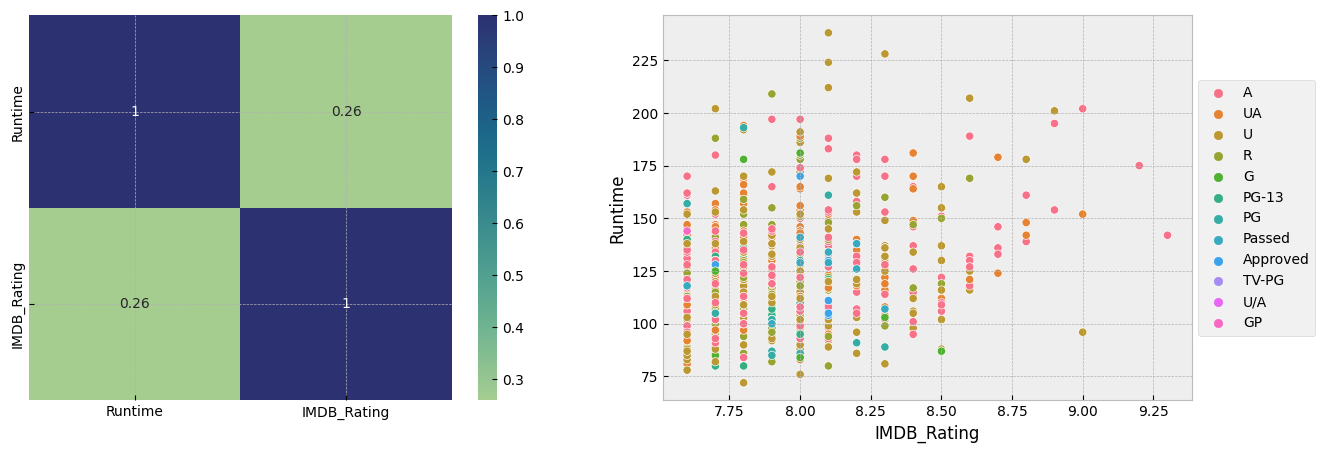

The correlation between Runtime and IMDB Rating is: 0.25955235957091877


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

heatmap_corr = df[['Runtime', 'IMDB_Rating']]

sns.heatmap(heatmap_corr.corr(), annot=True, cmap='crest', ax=axes[0])

sns.scatterplot(x='IMDB_Rating', y='Runtime', hue="Certificate", data=df, ax=axes[1])
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

print(f'The correlation between Runtime and IMDB Rating is: {heatmap_corr.corr().iloc[0,1]}')


# 5. Summary of Certificates

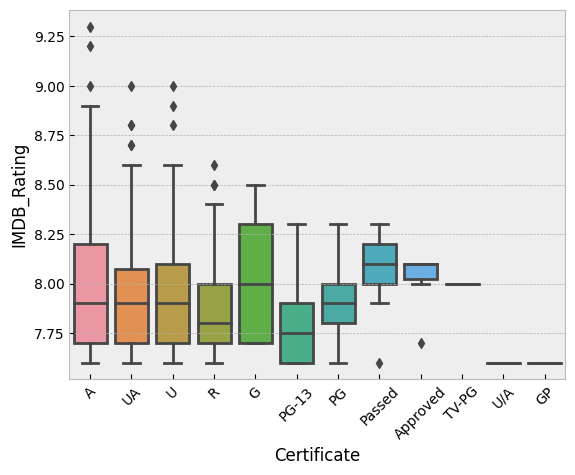

In [22]:
sns.boxplot(x='Certificate', y='IMDB_Rating', data=df)
plt.xticks(rotation=45)
plt.show()

# 6. The correlation between No_of_Votes and IMDB Rating

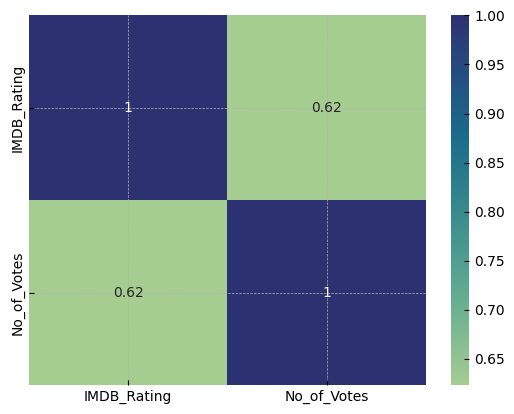

The correlation between No_of_Votes and IMDB Rating is: 0.6233507013733826


In [23]:
lheatmap_corr = df[['IMDB_Rating', 'No_of_Votes']]

f1 = sns.heatmap(lheatmap_corr.corr(), annot=True, cmap='crest')
plt.show()

print(f'The correlation between No_of_Votes and IMDB Rating is: {lheatmap_corr.corr().iloc[0,1]}')


# 7. Who are the most frequent collaborators (actor-director pairs) in high-rated movies?

In [24]:
df.groupby(['Director', 'Star1']).size().reset_index(name='count').sort_values('count',ascending=False).head(10)

,Director,Star1,count
279,Joel Coen,Ethan Coen,6
368,Martin Scorsese,Robert De Niro,6
47,Anthony Russo,Joe Russo,4
101,Christopher Nolan,Christian Bale,4
471,Richard Linklater,Ethan Hawke,4
107,Clint Eastwood,Clint Eastwood,4
367,Martin Scorsese,Leonardo DiCaprio,3
508,Ron Clements,John Musker,3
145,David Yates,Daniel Radcliffe,3
443,Peter Jackson,Elijah Wood,3


# 8. Which genre has the highest average IMDb rating?

In [25]:
df.groupby('Genre')['IMDB_Rating'].agg(['mean','count']).sort_values('mean',ascending=False).reset_index().head(10)

,Genre,mean,count
0,"Crime, Mystery, Thriller",8.50,1
1,"Action, Sci-Fi",8.40,3
2,"Horror, Sci-Fi",8.40,1
3,"Drama, Horror",8.40,1
4,"Drama, Mystery, War",8.35,2
5,Western,8.35,4
6,"Mystery, Romance, Thriller",8.30,1
7,"Crime, Drama, Sci-Fi",8.30,1
8,"Comedy, Musical, Romance",8.30,1
9,"Adventure, Mystery, Thriller",8.30,1


# 9. Which director has directed the most high-grossing movies?

In [26]:
df.groupby('Director')['Gross'].sum().sort_values(ascending=False).reset_index().loc[0]

Director    Steven Spielberg
Gross             2478133165
Name: 0, dtype: object

# 10. The relationship between Release Year and IMDB Rating between the 80s till Present

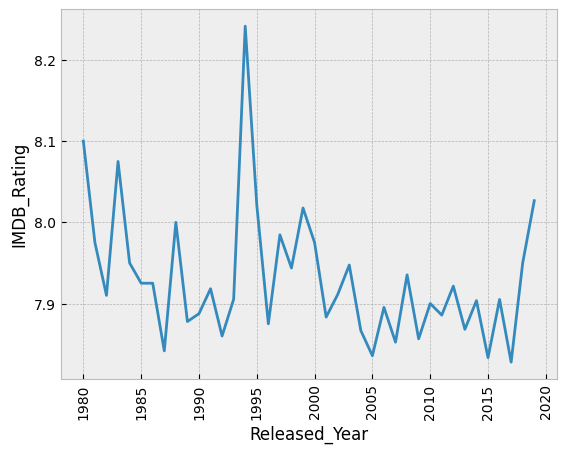

In [27]:
df_80s = df[df['Released_Year'] >= 1980]

sns.lineplot(x='Released_Year',y='IMDB_Rating', data=df_80s, errorbar=None)
plt.xticks(rotation=90)
plt.show()